In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cleaned.csv")
df['approx_cost'] = df['approx_cost'].astype("float32")
df['rating'] = df['rating'].astype("float32")
df['rating_count'] = df['rating_count'].astype("int32")
df.head(2)

,url,address,name,online_order,book_table,rating,rating_count,phone,location,rest_type,specialty,cuisines,approx_cost,reviews,menu,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"['080 42297555', '+91 9743772233']",Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",No Menu,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,['080 41714161'],Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,"[('Rated 4.0', 'RATED\n Had been here for din...",No Menu,Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rating        51717 non-null  float32
 6   rating_count  51717 non-null  int32  
 7   phone         51717 non-null  object 
 8   location      51717 non-null  object 
 9   rest_type     51717 non-null  object 
 10  specialty     51717 non-null  object 
 11  cuisines      51717 non-null  object 
 12  approx_cost   51717 non-null  float32
 13  reviews       51717 non-null  object 
 14  menu          51717 non-null  object 
 15  type          51717 non-null  object 
 16  city          51717 non-null  object 
dtypes: float32(2), int32(1), object(14)
memory usage: 6.1+ MB


# Data Visualization

## Restaurants delivering Online or not

In [4]:
def Pie_NumData(x):
    return f'{x:.1f}%\n{int(df.shape[0]*x/100)} Rest.'

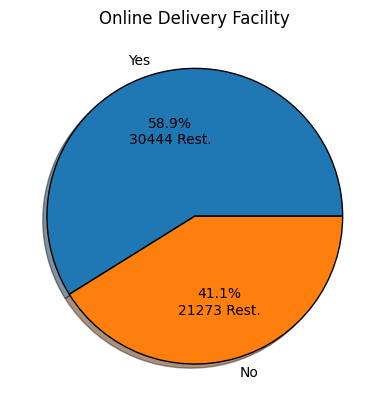

In [5]:
plt.pie(df["online_order"].value_counts(),
        labels=df["online_order"].unique(),
        autopct=lambda pct: Pie_NumData(pct),
        shadow=True,
        wedgeprops={
            "edgecolor":"black",
            "linewidth":1,
            "antialiased": True
        })
plt.title("Online Delivery Facility")
plt.show()

In [6]:
No = df[['online_order','rating']][df['online_order']=='No'].copy()
Yes = df[['online_order','rating']][df['online_order']=='Yes'].copy()

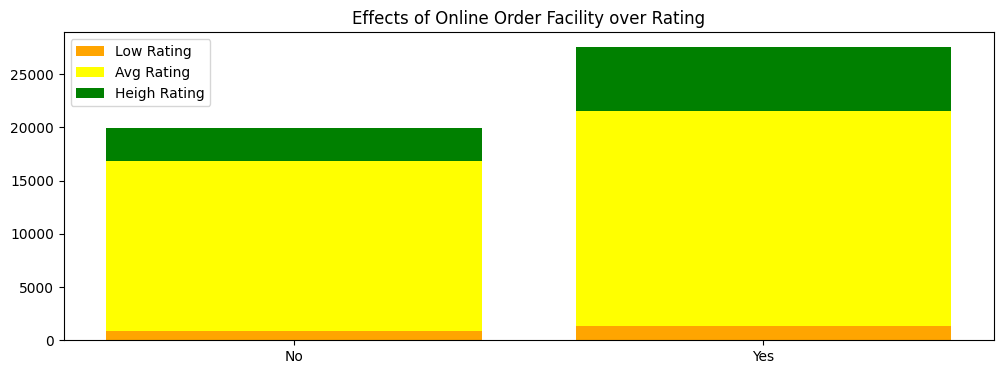

In [7]:
plt.figure(figsize=(12,4))
plt.bar(No['online_order'],
        No['rating'][No['rating']<3].shape[0],
        color='orange', label='Low Rating')
plt.bar(No['online_order'],
        No['rating'][(No['rating']<4) & (No['rating']>3)].shape[0],
        bottom=No['rating'][No['rating']<3].shape[0],color='yellow',label='Avg Rating')
plt.bar(No['online_order'],
        No['rating'][No['rating']>4].shape[0],
        bottom=(No['rating'][No['rating']<3].shape[0] + 
                No['rating'][(No['rating']<4) & (No['rating']>3)].shape[0]),
        color='green',
        label='Heigh Rating')

plt.bar(Yes['online_order'],
        Yes['rating'][Yes['rating']<3].shape[0],
        color='orange')
plt.bar(Yes['online_order'],
        Yes['rating'][(Yes['rating']<4) & (Yes['rating']>3)].shape[0],
        bottom=Yes['rating'][Yes['rating']<3].shape[0],color='yellow')
plt.bar(Yes['online_order'],
        Yes['rating'][Yes['rating']>4].shape[0],
        bottom=(Yes['rating'][Yes['rating']<3].shape[0] + 
                Yes['rating'][(Yes['rating']<4) & (Yes['rating']>3)].shape[0]),
        color='green')

plt.title("Effects of Online Order Facility over Rating")
plt.legend(loc="upper left")
plt.show()
del No, Yes

## Restaurants allowing table booking or not

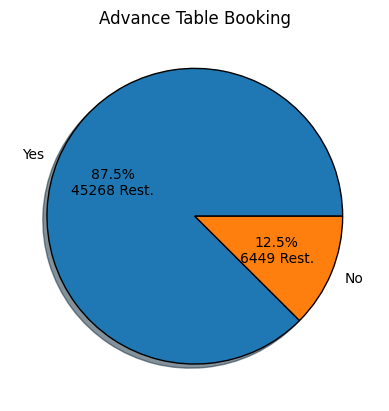

In [8]:
plt.pie(df['book_table'].value_counts(),
       autopct= lambda pct: Pie_NumData(pct),
       labels=df['book_table'].unique(),
       shadow=True,
       wedgeprops={
           'edgecolor':"black",
           'linewidth':1,
           'antialiased':True
       })
plt.title("Advance Table Booking")
plt.show()

In [9]:
No = df[['book_table','rating']][df['book_table']=='No'].copy()
Yes = df[['book_table','rating']][df['book_table']=='Yes'].copy()

/home/sptrop/Desktop/.desk/Jupyter/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


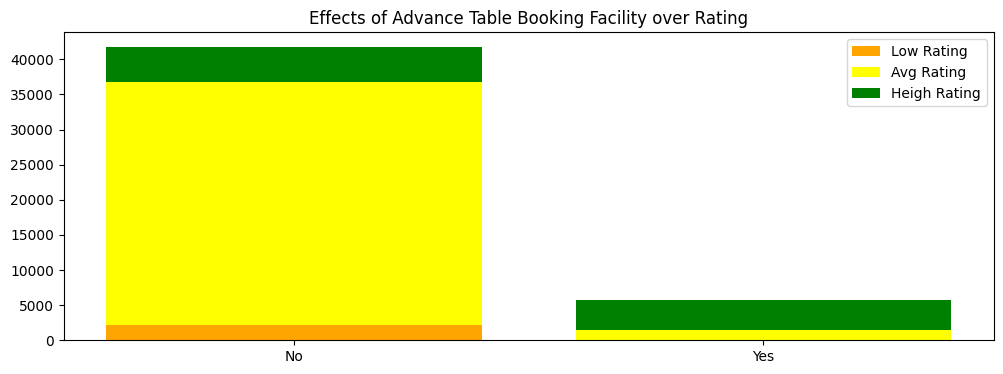

In [10]:
plt.figure(figsize=(12,4))
plt.bar(No['book_table'],
        No['rating'][No['rating']<3].shape[0],
        color='orange', label='Low Rating')
plt.bar(No['book_table'],
        No['rating'][(No['rating']<4) & (No['rating']>3)].shape[0],
        bottom=No['rating'][No['rating']<3].shape[0],color='yellow',label='Avg Rating')
plt.bar(No['book_table'],
        No['rating'][No['rating']>4].shape[0],
        bottom=(No['rating'][No['rating']<3].shape[0] + 
                No['rating'][(No['rating']<4) & (No['rating']>3)].shape[0]),
        color='green',
        label='Heigh Rating')

plt.bar(Yes['book_table'],
        Yes['rating'][Yes['rating']<3].shape[0],
        color='orange')
plt.bar(Yes['book_table'],
        Yes['rating'][(Yes['rating']<4) & (Yes['rating']>3)].shape[0],
        bottom=Yes['rating'][Yes['rating']<3].shape[0],color='yellow')
plt.bar(Yes['book_table'],
        Yes['rating'][Yes['rating']>4].shape[0],
        bottom=(Yes['rating'][Yes['rating']<3].shape[0] + 
                Yes['rating'][(Yes['rating']<4) & (Yes['rating']>3)].shape[0]),
        color='green')

plt.title("Effects of Advance Table Booking Facility over Rating")
plt.legend()
plt.show()
del Yes, No